# Build and test the model for predicting the resale price of a second-hand car in the UK

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("autotrader_prices_eda.csv")

## choose relevant columns

In [3]:
# Define numerical and categorical features
numerical_features = []
categorical_features = []

for feature, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        numerical_features.append(feature)
    else:
        categorical_features.append(feature)

In [4]:
categorical_features

['ULEZ', 'body', 'fuel', 'transmission', 'year_reg', 'make', 'model']

In [5]:
df.head()

,BHP,ULEZ,body,engine,fuel,mileage,owners,price,transmission,year,...,performance,2dr,3dr,4dr,5dr,dsg,speed,gti,gtd,gte
0,123.0,ULEZ,Hatchback,1.4,Petrol,34414,2.0,9980,Manual,2017,...,0,0,0,0,0,0,0,0,0,0
1,114.0,ULEZ,Hatchback,1.4,Petrol,16773,2.0,11500,Manual,2017,...,0,0,1,0,0,0,0,0,0,0
2,114.0,ULEZ,Hatchback,1.6,Diesel,76922,2.0,8599,Manual,2017,...,0,0,0,0,0,0,0,0,0,0
3,114.0,ULEZ,Hatchback,1.4,Petrol,10950,2.0,12174,Manual,2017,...,0,0,0,0,1,0,0,0,0,0
4,114.0,ULEZ,Hatchback,1.6,Diesel,58278,2.0,9172,Manual,2017,...,0,0,1,0,0,0,0,0,0,0


## Encode the categorical features
* Using pandas get_dummies()

In [6]:
df_dum = pd.get_dummies(df)
df_dum.head()

,BHP,engine,mileage,owners,price,year,name_length,missing_BHP,sport,se,...,model_C-Class,model_CT,model_Golf,model_Kona,model_Mazda3,model_Mazda6,model_NX,model_Qashqai,model_Tucson,model_e-Golf
0,123.0,1.4,34414,2.0,9980,2017,65,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,114.0,1.4,16773,2.0,11500,2017,26,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,114.0,1.6,76922,2.0,8599,2017,63,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,114.0,1.4,10950,2.0,12174,2017,26,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,114.0,1.6,58278,2.0,9172,2017,25,1,1,0,...,0,0,0,0,0,0,0,0,0,0


## train test split

In [7]:
X = df_dum.drop("price", axis=1)
y = df_dum["price"].values
X.shape, y.shape

((1233, 87), (1233,))

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((986, 87), (247, 87), (986,), (247,))

## multiple linear regression

In [11]:
# Build Ordinary Least Square (OLS) as a baseline model
import statsmodels.api as sm

In [12]:
X_sm = sm.add_constant(X_train)
model_OLS = sm.OLS(y_train, X_sm)
model_OLS.fit().summary()

D:\Apps\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     121.6
Date:                Sat, 02 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:45:00   Log-Likelihood:                -8641.0
No. Observations:                 986   AIC:                         1.743e+04
Df Residuals:                     913   BIC:                         1.779e+04
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                -3.868e+05   1.68e+05     -2.309      0.021   -7.16e+05    -5.8e+04
BHP                                     23.7425      2.385      9.954      0.000      19.062      28.423
engine                                2611.4948    337.843      7.730      0.000    1948.456    3274.534
mileage                                 -0.0541      0.005    -10.240      0.000      -0.064      -0.044
owners                                 394.9733   1643.005      0.240      0.810   -2829.531    3619.478
year                                   504.4290    215.584      2.340      0.020      81.331     927.527
name_length                              9.0891      8.841      1.028      0.304      -8.263      26.441
missing_BHP                            156.5982    141.860      1.104      0.270    -121.812     435.008
sport                                  195.3340    287.304      0.680      0.497    -368.520     759.188
se                                    -823.7248    223.447     -3.686      0.000   -1262.254    -385.196
amg                                   2531.1725    379.718      6.666      0.000    1785.952    3276.393
tfsi                                  1277.5193   1384.673      0.923      0.356   -1439.993    3995.031
nav                                   -382.4135    210.224     -1.819      0.069    -794.992      30.165
tsi                                   2857.1967   1319.151      2.166      0.031     268.275    5446.118
tdi                                   1817.5952   1360.978      1.336      0.182    -853.414    4488.604
premium                                222.6589    282.373      0.789      0.431    -331.516     776.833
dci                                   1146.0146    343.795      3.333      0.001     471.295    1820.735
m sport                               1761.7356    416.998      4.225      0.000     943.349    2580.122
sportback                             -385.5468    461.801     -0.835      0.404   -1291.861     520.767
edition                                771.3696    303.910      2.538      0.011     174.927    1367.812
tech                                   723.6522    294.971      2.453      0.014     144.751    1302.553
crdi                                  1864.5642    464.305      4.016      0.000     953.335    2775.793
tronic                                -279.8234    361.915     -0.773      0.440    -990.105     430.458
cod                                    294.5151    395.789      0.744      0.457    -482.246    1071.277
s line                                1280.7084    326.800      3.919      0.000     639.342    1922.075
bluetooth                             -733.3640    365.209     -2.008      0.045   -1450.111     -16.617
leather                               

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm, X_train, y_train, scoring = "neg_mean_absolute_error", cv=5))

-1254.5641543506676

## Lasso regression

In [14]:
# Build linear regression model with L2 regularization
from sklearn.linear_model import Lasso

In [15]:
lm_lasso = Lasso(max_iter=10000)
lm_lasso.fit(X_train, y_train)

np.mean(cross_val_score(lm_lasso, X_train, y_train, scoring = "neg_mean_absolute_error", cv=5))

-1251.6124151503816

### Hyperparameter tuning on regularisation parameter alpha

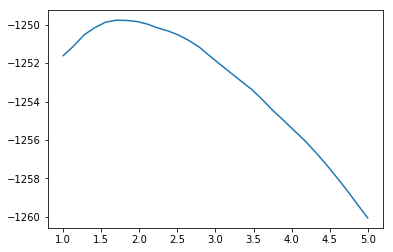

In [16]:
# tune the model for the optimisation alpha
alpha = []
error = []

for a in np.linspace(1,5,30):
    alpha.append(a)
    lm_lasso_tune = Lasso(alpha=a, max_iter=10000)
    error.append(np.mean(cross_val_score(lm_lasso_tune, X_train, y_train, scoring = "neg_mean_absolute_error", cv=5)))

plt.plot(alpha,error)

In [17]:
# find alpha value with minimum mean absolute error
err = list(zip(alpha,error))
df_err = pd.DataFrame(err, columns=["alpha","error"])
df_err[df_err.error == np.max(df_err.error)]

,alpha,error
5,1.689655,-1249.772898


In [18]:
lm_lasso = Lasso(alpha=1.689655, max_iter=10000)
lm_lasso.fit(X_train, y_train)
np.mean(cross_val_score(lm_lasso, X_train, y_train, scoring = "neg_mean_absolute_error", cv=5))

-1249.772897596559

## RandomForestRegressor

In [19]:
# build a random forest model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=7)

np.mean(cross_val_score(rf, X_train, y_train, scoring = "neg_mean_absolute_error", cv=5))

-1301.0698007949936

## hyperparameter tuning

In [20]:
# tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

params = {"n_estimators": range(100,240,20),
          "criterion":["mse", "mae"],
          "max_features":["auto", "sqrt", "log2"],
          "min_samples_leaf":[1,2,4],
          "min_samples_split":[2,5,10]}

gs = GridSearchCV(rf, params, scoring="neg_mean_absolute_error", cv=3)
gs.fit(X_train, y_train)

D:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=7, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(100, 240, 20), 'criterion': ['mse', 'mae'], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [21]:
gs.best_score_

-1249.1359318335485

In [22]:
gs.best_params_

{'criterion': 'mse',
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 220}

## test ensembles

In [23]:
# predict prices on test set
pred_lm = lm.predict(X_test)
pred_lm_lasso = lm_lasso.predict(X_test)
pred_rf = gs.best_estimator_.predict(X_test)

In [24]:
from sklearn.metrics import mean_absolute_error
valuation = {"Linear Regression": mean_absolute_error(y_test, pred_lm),
             "Lasso Regression": mean_absolute_error(y_test, pred_lm_lasso),
             "RandomForestRegressor": mean_absolute_error(y_test, pred_rf)}
valuation

{'Linear Regression': 1154.9761938930344,
 'Lasso Regression': 1148.1925589541343,
 'RandomForestRegressor': 1042.9244352139087}

## feature importance the RandomForest Regression model

In [60]:
feature_dict = dict(zip(df_dum.drop("price",axis=1).columns,list(gs.best_estimator_.feature_importances_)))

In [61]:
feature_dict = dict(sorted(feature_dict.items(), key=lambda item: item[1], reverse=True))

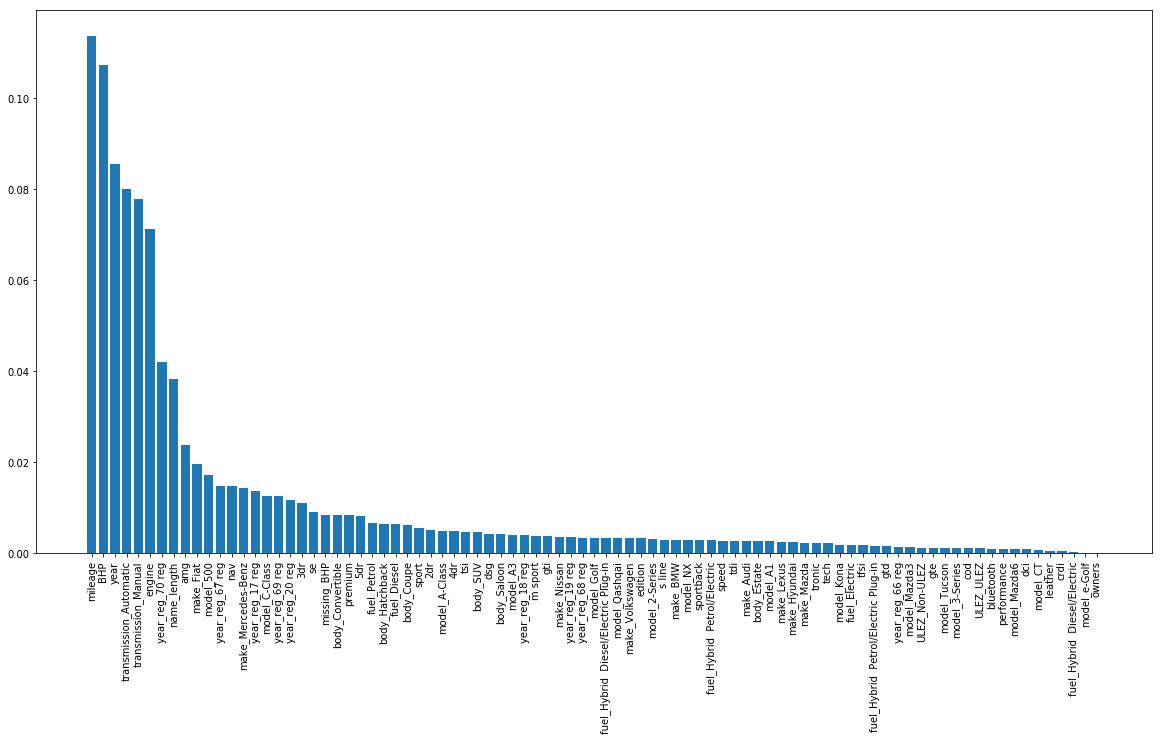

In [62]:
df_features = pd.DataFrame(feature_dict,index=["Coefficients"])
plt.figure(figsize=(20,10))
plt.bar(df_features.columns,df_features.iloc[0])
plt.xticks(rotation='vertical')
plt.show()

# Deploy the model into production using pickle

In [67]:
# pickle the model
import pickle
auto_estimator = {'model': gs.best_estimator_}
pickle.dump(auto_estimator, open('model_file' + ".p", "wb"))

In [69]:
# test the pickled model for prediction

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

model.predict(X_test.iloc[0,:].values.reshape(1,-1)), y_test[0]

(array([16235.61818182]), 16450)